tensor(0.0003)
tensor([ 7.2081e-05,  1.6894e-04, -1.8437e-04,  ..., -1.2475e-04,
        -3.0675e-04,  6.3227e-05])
tensor([1.0000e-05, 1.0000e-05])


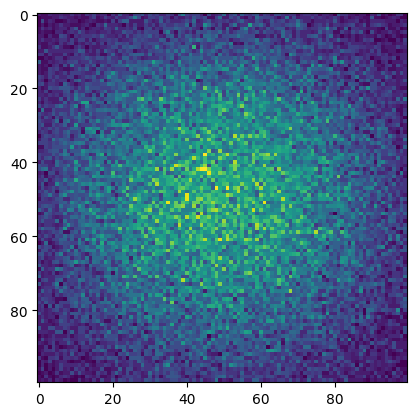

In [4]:
from cheetah.particles import ParticleBeam
from cheetah.accelerator import Drift, Quadrupole, Segment, Screen
import torch
import numpy as np
import matplotlib.pyplot as plt
#TODO: screen element inside of cheetah, pv returns histogram
#TODO: get default values for pvs
#TODO: hardcode all quads as beam line elements, hardcode PVDB for quads and camera,
#
twiss_params = {
'energy' : torch.tensor(1e9),
'emittance_x' : torch.tensor(5e-8),
'emittance_y' : torch.tensor(5e-8),
'beta_x' : torch.tensor(1.0),
'alpha_x' : torch.tensor(0.0),
'beta_y' : torch.tensor(1.0),
'alpha_y' : torch.tensor(0.0),
'total_charge' : torch.tensor(1e-9),
}
sim_cheetah_beam = ParticleBeam.from_twiss(**twiss_params)
sim_beamline = Segment(
    [
        Drift(length=torch.tensor(1.0)),
        Screen(name='OTRS2', resolution=(100,100), pixel_size=torch.ones(2)*(10e-6), is_active=True)
    ]
)
tracked = sim_beamline.track(sim_cheetah_beam)
print(tracked.sigma_x)
print(sim_beamline.OTRS2.get_read_beam().x)
print(sim_beamline.OTRS2.pixel_size)

plt.imshow(sim_beamline.OTRS2.reading)
plt.show()

In [3]:
tracked.particle_charges

tensor([0., 0., 0.,  ..., 0., 0., 0.])